<a href="https://colab.research.google.com/github/MalikHasnat1999/ZTM_Tensorflow/blob/master/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

> Regression analysis is a set of statistical processes for estimating the relationships between a **Dependent variable** (often called the 'outcome variable' or 'x-axis') and one or more **Independent variables** (often called 'predictors', 'covariates', or 'features' or 'y-axis').

# Creating Data to view and fit

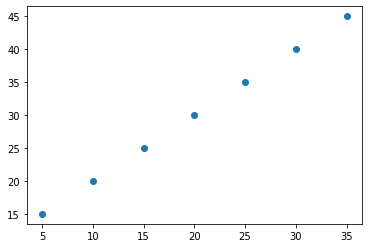

In [ ]:
# Create features
x = np.array([5,10,15,20,25,30,35])

# Create labels
y = np.array([15,20,25,30,35,40,45])

# Visualize it
plt.scatter(x, y)

In [ ]:
# Input and output shapes

In [ ]:
# Creating Demo Tensor for house price prediction problem
house_info = tf.constant(["Bedrooms","Washrooms","Garage"])
house_price = tf.constant([1000000])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedrooms', b'Washrooms', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000000], dtype=int32)>)

In [ ]:
input = x[0].shape
output = y[0].shape
input, output

# wrong output we want 1 output for 1 input
# But we are not getting it
# x[0],y[0] gives scalar value

((), ())

In [ ]:
x[0].ndim

0

In [ ]:
x[0], y[0]
# These are Scalar Values that why have 0 dimension

(5, 15)

# 41.Steps in Modelling with tensorflow

1. Creating a model -> defining input output Layers
2. Compiling a model -> define Loss and optimizer functions
3. Fitting a model ->  letting model try find pattern b/w X and Y
3. Improving the model
4. Evaluating the model

## Some useful Definations

**loss** 

how wrong your model predictions are from the truth labels (you want to minimize this)

**Optimizer**

how your model should update its internal patterns to better its predictions

**Metrices**

human interpretable values for how well your model is doing

**Epochs**

how many time the model will go through the training examples (No of Iteration)

**MAE**
(Mean Absolute Error)

Comparisons of predicted value versus observed value

**SGD** (Stochastic Gradient Descent)

is an iterative method for optimizing an objective function with suitable smoothness properties


In [ ]:
# Creating the Model
# Converting to Tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(7,), dtype=int64, numpy=array([ 5, 10, 15, 20, 25, 30, 35])>,
 <tf.Tensor: shape=(7,), dtype=int64, numpy=array([15, 20, 25, 30, 35, 40, 45])>)

In [ ]:
# 1. Creating the model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
    
# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  # Predicted value - Observed value
              optimizer = tf.keras.optimizers.SGD()) 

# 3. Fit the model
model.fit(x,y, epochs=5) # epoches == No. of iterations

Epoch 1/5
1/1 [==============================] - 1s 611ms/step - loss: 6.4682
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 4.5959
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 3.7889
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 3.7793
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 3.7571


In [ ]:
# Predicting using our model
model.predict([40])


array([[55.37784]], dtype=float32)

# 42.Improving the model

We can improve the model by altering the steps we took to create the model:

1. **Creating the model** - here we might add more layers, increase the number of hidden units(called nerons) within each of the hidden layer, change the activation function of each layers
2. **Compiling the model** - here we might change the optimization function or perhaps the ***learning rate(lr)*** of the optimization function
3. **Fitting the model** - here we might fit a model for epcohs(leave it training for longer) or on more data
(give the model more example to learn from) apply on full data instead of the subset of the data.

In [ ]:
# Rebuilding our model 

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(75, activation = None), # adding hidden neural netwrok layer
        tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),# Changing the optimizer to Adam (how much it should improve 
                                                            # each step) higher lr means Adam pushes the model 
                                                            # more to improve small lr small improvement
                                                            # it is the most important parameter to improve the model
              metrics="mae") 
                                                             
# 2. fit the model
model.fit(x, y, epochs=5) # increaseing the number of epochs to 100

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1/1 [==============================] - 0s 402ms/step - loss: 29.1472 - mae: 29.1472
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 24.9838 - mae: 24.9838
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 20.8039 - mae: 20.8039
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 16.5881 - mae: 16.5881
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.3124 - mae: 12.3124


In [ ]:
# predicting new outcome
model.predict([40])

array([[43.491894]], dtype=float32)

In [ ]:
x, y

(<tf.Tensor: shape=(7,), dtype=int64, numpy=array([ 5, 10, 15, 20, 25, 30, 35])>,
 <tf.Tensor: shape=(7,), dtype=int64, numpy=array([15, 20, 25, 30, 35, 40, 45])>)

# 45.Evaluating the model

When it comes to evaluation... there are three words that you shoud memorize
> visualize, visualize, visualzie
it's good idea to visualize:
* The Data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of the model - how does our model performs while it learns
* The prediction of the model - how do the prediction of the model line up against the ground truth(Original labels)?

In [ ]:
# Make a bigger data set
x = tf.range(-100,100,5)
x

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [ ]:
y = x + 10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

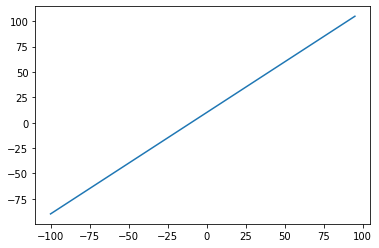

In [ ]:
# visualizing the data
plt.plot(x,y)

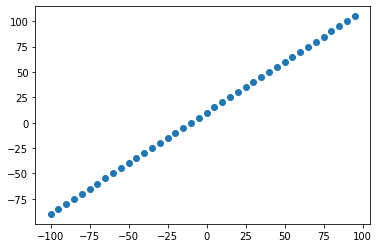

In [ ]:
plt.scatter(x,y)

**The 3 Set**

* **Training Data** - the model learns from this data, which is typically the 70% to 80% of the total data. eg Syllabus
* **Validation Data** - the model gets tuned on this data, which is typically the 10% to 15% of the data. eg Pre-Board Test
* **Testing Data** - the model gets evaluated on this data, 10% to 15% of the data. eg Final Paper

In [ ]:
len(x),len(y)

(40, 40)

In [ ]:
# split the data into train and test
x_train = x[:30] # first 30 are teh 80% of the data(0-30)
y_train = y[:30] 

x_test = x[30:]  # last 10 are the 20% of the data (30-40)
y_test = y[30:] 

len(x_train),len(x_test)

(30, 10)

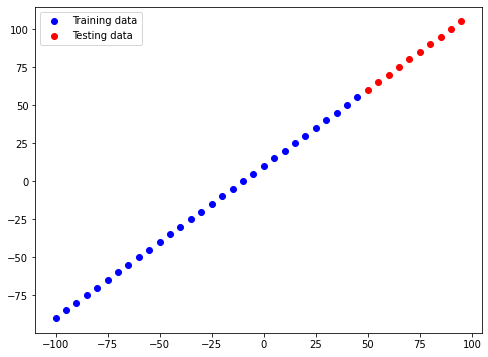

In [ ]:
# lets visualize the it
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='r', label='Testing data')
plt.legend()

In [ ]:
# Building a Neural Network for our Data

# Create the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Fitting the model
# model.fit(x_train, y_train, epochs=100)

In [ ]:
# model.summary()
# Error Occur case we have not yet build the model

In [ ]:
# Lets create the model that build automatically by defining the "input_shape" argument

# setting the seed
tf.random.set_seed(42)

# creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1], name="myLayer_1"),# input_shape = 1 cause we want one y for each x given
  tf.keras.layers.Dense(1, name="myLayer_2")    # Because all inputs are connected to all output, these 
                                                # layers are called Dense Layers    
], name="model_1")

# compling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
myLayer_1 (Dense)            (None, 1)                 2         
_________________________________________________________________
myLayer_2 (Dense)            (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters(patterns) the model can update as it trains
* Non-Trainable params - these parameter are not updated during training (this is typical when you bring in already learned patterns or paremeters from other models during **Transfer Learning**)



Check out MIT's Introduction to Deep Learning

In [ ]:
model.fit(x_train,y_train, epochs=100, verbose=0)

In [ ]:
####
#
#
# EXERCISE
#
#
####


# Playing with the number of the hidden units in the dense layer

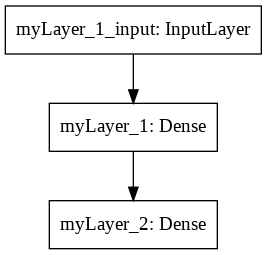

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

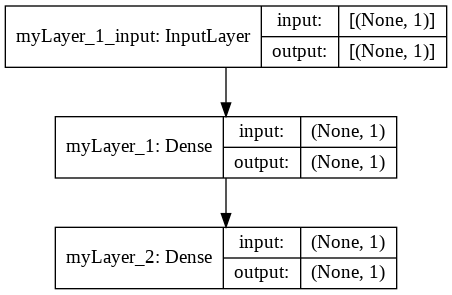

In [ ]:
plot_model(model=model,show_shapes=True)

### Visualizing our model predictions
To visualize predictions, its a good idea to plot them against the ground truth labels.

often you'will this in the form of `y_true` or `y_test` versus `y_pred` (ground truth versus your model)


In [ ]:
# Make some prediction
y_pred = model.predict(x_test)
y_pred

array([[ 55.69216 ],
       [ 61.159496],
       [ 66.62683 ],
       [ 72.09418 ],
       [ 77.56151 ],
       [ 83.02884 ],
       [ 88.49617 ],
       [ 93.96351 ],
       [ 99.43084 ],
       [104.89817 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

In [ ]:
# Create a plotting Function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  """
  plot training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(8,6))
  plt.scatter(train_data, train_labels, c='b', label="Training Data")
  plt.scatter(test_data, test_labels, c='r', label="Testing Data")
  plt.scatter(test_data, predictions, c='g', label="Prediction")
  plt.legend()


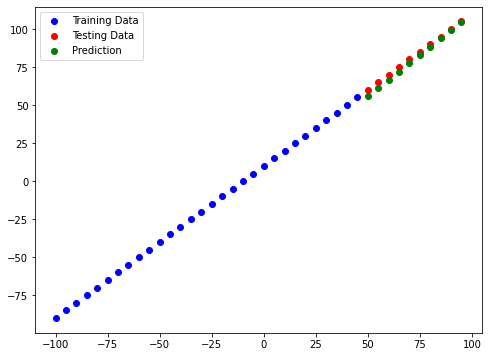

In [ ]:
plot_predictions()

### Evaluation our model's predictions with regression evalution

Depending on the problem you are working on, there will be different evaluaion metrics to evaluate your model performance

* MAE - mean absolute error, "On average how worng is each of my model prediction" |Actual - Predicted|

  **When to use** - great starter metric for any regression problem
* MSE - mean square error, "square the average errors"

  **When to use** - when larger error are more significant than the smaller errors

In [ ]:
# Evaluation the model on test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 2.2048 - mae: 2.2048


[2.204829692840576, 2.204829692840576]

In [ ]:
# calculating MAE()
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

# we are not getting the same mae as above

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([26.807837, 21.572403, 17.523901, 14.662329, 12.987699, 12.5     ,
       13.199234, 15.085403, 18.158504, 22.418537], dtype=float32)>

In [ ]:
y_test, y_pred

# 1) Because our y_test and y_pred are not of the same shape()
# 2) Further y_pred is not a tensor but and an array

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>,
 array([[ 55.69216 ],
        [ 61.159496],
        [ 66.62683 ],
        [ 72.09418 ],
        [ 77.56151 ],
        [ 83.02884 ],
        [ 88.49617 ],
        [ 93.96351 ],
        [ 99.43084 ],
        [104.89817 ]], dtype=float32))

In [ ]:
mae = tf.keras.losses.MAE(y_true = y_test,
                          y_pred = tf.squeeze(y_pred)) # we use squeeze() to remove shape=1 dimensions
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.2048297>

In [ ]:
# Calculating MSE()
mse = tf.keras.losses.MSE(y_true = y_test,
                          y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.663087>

In [ ]:
# Making functions to reuse in future
def mae(y_test, y_pred):
  return tf.keras.losses.MAE(y_true = y_test,
                             y_pred = tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.keras.losses.MSE(y_true = y_test,
                             y_pred = tf.squeeze(y_pred))

In [ ]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.2048297>

In [ ]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=6.663087>

### Runnnig Experiments to Improve our Model

```
build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it ...
```

1. Get more Data - get more examples for your model to train on (more opportunity to learn pattern or relationships b/w labels and features)
2. Make your model Larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

Let's do 3 Modelling Experiments

1. `model_1`  - same as original model, 1 Layer trained for 100 epochs
2. `model_2` - 2 Layers, trained for 100 epochs
3. `model_3` - 2 Layers, trained for 500 epochs 

**Build `model_1`**
* 1 Layer, trained for 100 epochs

In [ ]:
#### mode_1 ####

# Creating the model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
 ])

# Compiling the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fit the model
model_1.fit(x_train, y_train, epochs=100, verbose=0)


In [ ]:
# Predicting
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([[40.772797],
       [44.786743],
       [48.80069 ],
       [52.814636],
       [56.828583],
       [60.84253 ],
       [64.856476],
       [68.87042 ],
       [72.88437 ],
       [76.898315]], dtype=float32)

In [ ]:
# Evaluating the model
model_1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 92ms/step - loss: 23.6644 - mae: 23.6644


[23.664443969726562, 23.664443969726562]

(<tf.Tensor: shape=(), dtype=float32, numpy=23.664444>,
 <tf.Tensor: shape=(), dtype=float32, numpy=568.02734>,
 None)

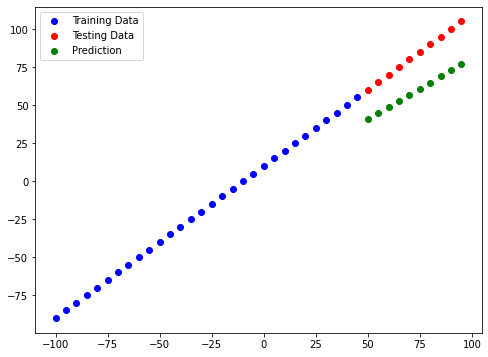

In [ ]:
# Using our Funcitons
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1, plot_predictions(predictions = y_pred_1) 

**Build `model_2`**
* 2 Layers, trained for 100 epochs

In [ ]:
#### model_2 ####

# create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fitting the model
model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
# Predicting
y_pred_2 = model_2.predict(x_test)
y_pred_2

array([[31.675344],
       [34.752323],
       [37.8293  ],
       [40.906273],
       [43.98325 ],
       [47.060226],
       [50.137203],
       [53.21418 ],
       [56.291157],
       [59.368134]], dtype=float32)

In [ ]:
# Evaluating the model
model_2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 36.9783 - mae: 36.9783


[36.9782600402832, 36.9782600402832]

(<tf.Tensor: shape=(), dtype=float32, numpy=36.97826>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1397.9005>,
 None)

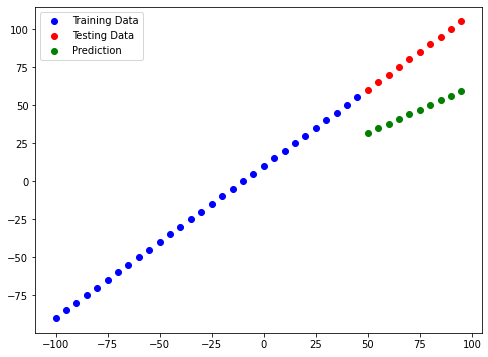

In [ ]:
# Using our Functions
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2, plot_predictions(predictions=y_pred_2)

**Build `model_3`**
* 2 Layers, trained for 500 epochs

In [ ]:
#### mdoel_3 ####

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fitting the model
model_3.fit(x_train, y_train, epochs=500, verbose=0)

In [ ]:
# predictions
y_pred_3 = model_3.predict(x_test)

In [ ]:
# Evaluating the model
model_3.evaluate(x_test, y_test)

1/1 [==============================] - 0s 96ms/step - loss: 5.7017 - mae: 5.7017


[5.7017059326171875, 5.7017059326171875]

(<tf.Tensor: shape=(), dtype=float32, numpy=5.701706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=37.262917>,
 None)

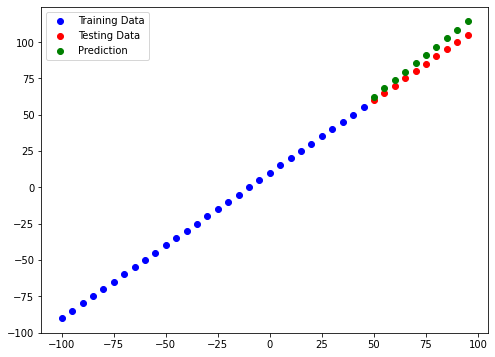

In [ ]:
# Using our Funcitons
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3, plot_predictions(predictions=y_pred_3)

### Comparing the results of our Experiments
Let's compare the results of the Experiments

In [ ]:
# Let's compare our resuls using Pandas DataFrame
import pandas as pd 

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

mylist = pd.DataFrame(model_results, columns = ["Model", "MAE", "MSE"])
mylist

,Model,MAE,MSE
0,model_1,23.664444,568.027344
1,model_2,36.978260,1397.900513
2,model_3,5.701706,37.262917


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


**Note** one of your main goal should be to minimize the time b/w the experiments. The more experiments you do, the more things you'll figure out which work and in turn, get closer to figuring out what does work

Remember the machine learning Practioner's motto:
*Experiment, Experiment, Experiment*

# 55.Tracking yout Experiments
One really good habit in machine learning modelling is to track the result of your experiments

And when doing so, it can be tedious if you are learning alots of experiments.Luckily there are tools to help us

**Resources:** As you build your model, you'll want to look into using:
* Tensorboard - a component of tensorflow library to help track modelling experiments
* Weights and Biases - a tool for tracking all kind of machine learning experiments (Plugs straight into Tensorboared)

#56.Saving our Models
Saving our model means we can use it outside of the google colab(or where ever they were trained) such as in web application and mobile app

Two formats:
* The SaveModel format
* The HDF5 format

In [ ]:
# SaveModel format
model_2.save("Best_MODEL")

INFO:tensorflow:Assets written to: Best_MODEL/assets


In [ ]:
# HDF5 format
model_2.save("Best_MODEL.h5")

## Loading in a Saved model

In [ ]:
my_model = tf.keras.models.load_model("/content/Best_MODEL")
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 prediction with the my_model
my_model_pred = my_model.predict(x_test)
model_2_pred = model_2.predict(x_test)
my_model_pred == model_2_pred 

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading the HDF5 Model
my_model = tf.keras.models.load_model("/content/Best_MODEL.h5")
my_model


# 59.A Larger Example

In [ ]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# showing the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# We are going to on-hot the columns that are not Nummerical
insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X and Y values (features(X) and labels(Y))
y = insurance["charges"]
x = insurance_one_hot[["age", "bmi", "children", "sex_female", "sex_male", "smoker_no", "smoker_yes", "region_northeast", "region_northwest", "region_southeast", "region_southwest"]]
x.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [ ]:
# Training and Testing Data Using built-in function
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
0.2*1338

# round off

267.6

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the Model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["mae"]
)

# Fit the model
history = insurance_model_1.fit(x_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Evaluate it
insurance_model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.3213 - mae: 3167.3213


[3167.3212890625, 3167.3212890625]

Text(0, 0.5, 'Loss')

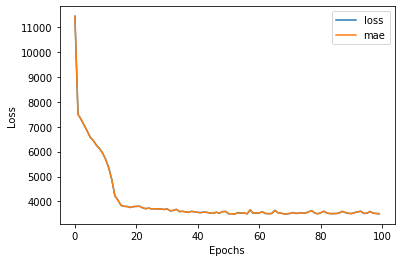

In [ ]:
# Plot Loss curve or Training Curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

> **Question** How long should we train our model

It depends on the problem you are working on. A function called ***EarlyStopping Callback***, which is a TensorFlow componenet that you can add to your model to stop training if the improvement of the model stops.. 

#62.Preprocessing data (Normalization and Standardization)

In terms of Scaling values, neural network tend to prefer normalization

if you are not sure which to use, try both and see which performs better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data we import from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Create Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children",]), # Trun all values in these columns b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create x and y values
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Train and Test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(x_train)

# Transform Taining and Test data with normalization and OneHotEncoder
x_train_normal = ct.transform(x_train)
y_train_normal = ct.transform(x_test)

In [ ]:
# what does our data look like?
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Building the Neural Network
# we are going to use the same insurance model as above
tf.random.set_seed(42)

# create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# fit the model
insurance_model_2.fit(x_train_normal, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
insurance_model_2.evaluate(x_train_normal, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3498.4050 - mae: 3498.4050


[3498.405029296875, 3498.405029296875]

#**Exercise**

##Q-1

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = tf.range(5000, 10000, 5)
y = x * 3

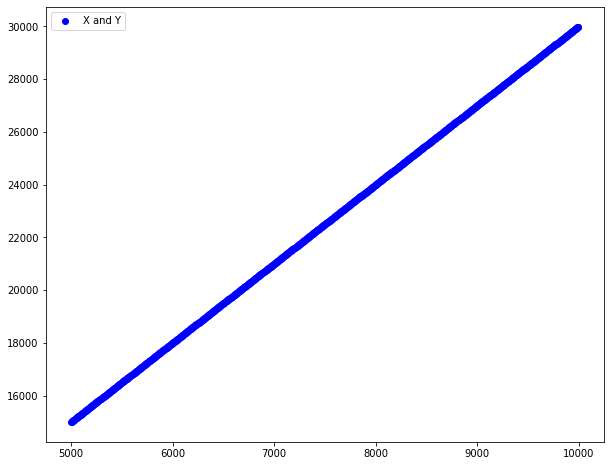

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, c='b', label="X and Y")
plt.legend()

In [ ]:
# Building the model

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
history = model.fit(x,y,epochs=100,verbose=0)

In [ ]:
# Evaluate tge model
model.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.5653 - mae: 7.5653


[7.565279483795166, 7.565279483795166]

Text(0, 0.5, 'Loss')

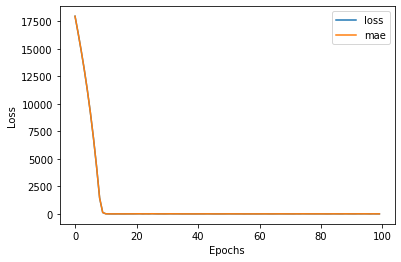

In [ ]:
# plot Loss curve or Training Curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
# Train and Test set
x_train = x[:800]
x_test = x[800:]
y_train = y[:800]
y_test = y[800:]

In [ ]:
len(x_train), len(x_test)

(800, 200)

In [ ]:
# Building the model

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
history = model.fit(x_train,y_train,epochs=100,verbose=0)

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 3.4156 - mae: 3.4156


[3.415585994720459, 3.415585994720459]

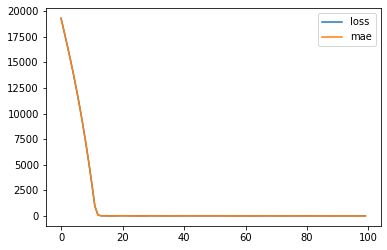

In [ ]:
pd.DataFrame(history.history).plot()

## Q-2

In [ ]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
history = model.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
model.evaluate(x_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

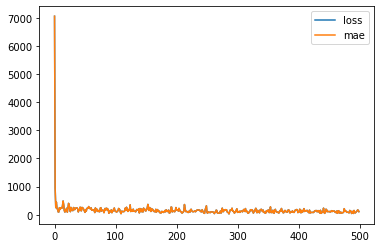

In [ ]:
pd.DataFrame(history.history).plot()

## Q-3

In [ ]:
data = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
data

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.